<a href="https://colab.research.google.com/github/sheng-999/Stats_test/blob/upload/Predict_next_fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 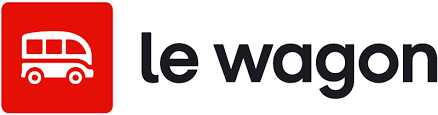

# Predict next fashion

Making clothes take a lot of time. Go to market can take one to two years !

Predicting next trend is primordial.

Heuritech startup is using social network signals to anticipate and predict next trend.

## Load data

a) Download [`tendances.csv`](https://drive.google.com/file/d/1BnM5wqGdlt2Lsy2lN4d11UM5_HqRRHaQ/view?usp=sharing) and import in in colab.

Columns are for different types of clothes and rows are for dates between 2015 and 2019.

Values correspond to an internal index to designate popularity on social networks.

We will try to predict these indices.

a) Load data into a `df` DataFrame. Use parameter `index_col=0` to set date as index.

What is the period? Weekly, monthly, ...

In [240]:
import pandas as pd
df = pd.read_csv('/content/tendances.csv', index_col=0)

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, 2015-01-05 to 2018-12-31
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   shoes_laceup                 209 non-null    float64
 1   body_spaghettistraps         209 non-null    float64
 2   top_tanksleeve_tshirtneck    209 non-null    float64
 3   pants_denim                  209 non-null    float64
 4   eyewear_squaredglassesshape  209 non-null    float64
dtypes: float64(5)
memory usage: 9.8+ KB


In [242]:
df.head()

,shoes_laceup,body_spaghettistraps,top_tanksleeve_tshirtneck,pants_denim,eyewear_squaredglassesshape
2015-01-05,0.059474,0.001604,0.002377,0.024241,0.002614
2015-01-12,0.071067,0.001621,0.001561,0.023861,0.003187
2015-01-19,0.077554,0.001157,0.001768,0.027625,0.002160
2015-01-26,0.061715,0.001067,0.002447,0.029950,0.002032
2015-02-02,0.060737,0.001118,0.001854,0.030590,0.003329


b) With `plotly.express` plot all series in a same chart.

In [243]:
import plotly.express as px

In [244]:
px.line(df)

c) Do you any upward or downward trend?

-   Neither, seasonal trend

d) Do you see any seasonality?

- Annual

e) To confirm the intuition, we will decompose time series data `trend` + `seasonality` + `residuals`.

Execute cell below to do so.

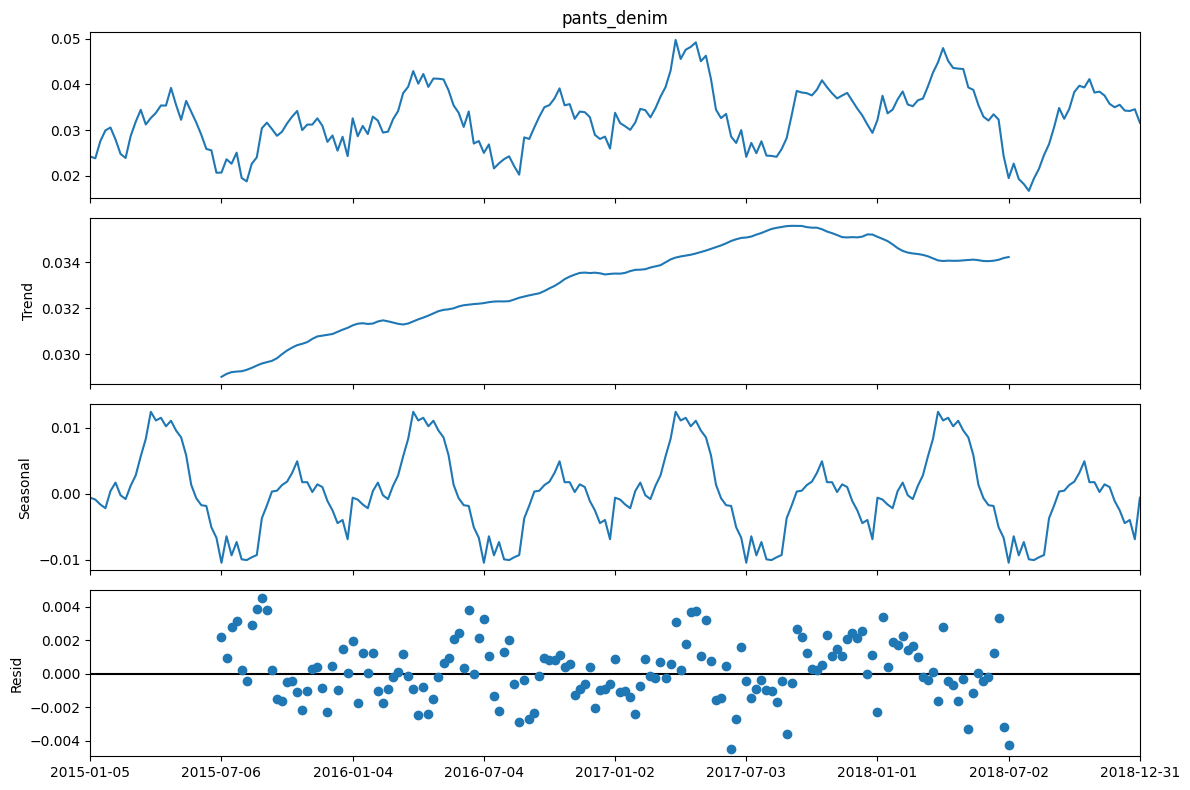

In [245]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# decompose time serie
r = seasonal_decompose(df['pants_denim'], period=52)

# save plot to fig variable
fig = r.plot()
# set custom dimensions
fig.set_figwidth(12)
fig.set_figheight(8)
plt.tight_layout()

# delete all x axis except
for ax in fig.get_axes():
    ax.set_xticks(list(range(0,209,26)))

f) Can you interpret the seasonality of denim? What times of the year do people wear more denim?

What do you think about the popularity of denim between 2015 and 2018?

Modify the code to view the breakdowns of the other time series, trying to see if your fashion intuitions were good or not.

## Preprocessing data



a) In order to prepare the modeling, we need the Data Frame to be well formatted. In particular, we want to have:

1. an index that is of periodic type, with a weekly frequency (`dtype: 'period[W-MON]'`)

2. and a column named `date` which is of time type (`dtype: datetime64[ns]`)

Do the necessary pre-processing.

In [246]:
# Create a new column 'date' containing the df.index cast into datetime format
df['date'] = pd.to_datetime(df.index)

# set index with date column values
df.index = df['date'].values


# make index periodic
# df.set_index(df['date'].dt.to_period('W-MON'), inplace=True)
df.index = df.index.to_period('W-MON')

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 209 entries, 2014-12-30/2015-01-05 to 2018-12-25/2018-12-31
Freq: W-MON
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   shoes_laceup                 209 non-null    float64       
 1   body_spaghettistraps         209 non-null    float64       
 2   top_tanksleeve_tshirtneck    209 non-null    float64       
 3   pants_denim                  209 non-null    float64       
 4   eyewear_squaredglassesshape  209 non-null    float64       
 5   date                         209 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(5)
memory usage: 11.4 KB


b) Split between train and test data.

We will use last year of data as test set (`df_test`) and the rest for training (`df_train`).

Use `temporal_train_test_split` method, what should you put in `test_size` parameter?

In [248]:
!pip install sktime -q

In [249]:
from sktime.forecasting.model_selection import temporal_train_test_split

In [250]:
df_train, df_test = temporal_train_test_split(
    df,
    test_size = 52
)
df_train.shape, df_test.shape

((157, 6), (52, 6))

## Modeling

### Modeling - Naive

For simplicity, we will restrict ourselves in this section to the time serie `top_tanksleeve_tshirtneck`.

a) Train a naive model by using `NaiveForecaster` of sktime library.

Predict last year values and store results in a `naive_preds` variable.

In [251]:
from sktime.forecasting.naive import NaiveForecaster

cloth = 'top_tanksleeve_tshirtneck'

# intialize model with a `sp` parameter
naive_model = NaiveForecaster(sp=52)
# fit model
naive_model.fit(df_train['top_tanksleeve_tshirtneck'])
# predict last year values, use list(range(1,53)) to create a list [1,2,...,52]
horizon = range(1,53)
preds = naive_model.predict(fh = horizon)

b) In `df_test` variable, create a new column `naive_model` with naive predictions values.

Visualize predicted and real data with plotly express (y parameter of px.line() function can be a list of columns names)

In [252]:
# create a new column "naive_model" with naive predictions
df_test['naive_model'] = preds

# visualize data
df_test


,shoes_laceup,body_spaghettistraps,top_tanksleeve_tshirtneck,pants_denim,eyewear_squaredglassesshape,date,naive_model
2018-01-02/2018-01-08,0.078038,0.001408,0.000892,0.037528,0.001326,2018-01-08,0.001076
2018-01-09/2018-01-15,0.079651,0.001117,0.000227,0.033685,0.001352,2018-01-15,0.000663
2018-01-16/2018-01-22,0.074901,0.001221,0.000430,0.034487,0.001071,2018-01-22,0.001294
2018-01-23/2018-01-29,0.075818,0.001568,0.000346,0.036749,0.000908,2018-01-29,0.001045
2018-01-30/2018-02-05,0.075028,0.001666,0.000435,0.038461,0.000827,2018-02-05,0.001178
2018-02-06/2018-02-12,0.072859,0.001259,0.000673,0.035619,0.000643,2018-02-12,0.001615
2018-02-13/2018-02-19,0.072339,0.001817,0.000666,0.035232,0.001044,2018-02-19,0.001317
2018-02-20/2018-02-26,0.077507,0.001054,0.000446,0.036531,0.000936,2018-02-26,0.001069
2018-02-27/2018-03-05,0.082089,0.000823,0.000945,0.036897,0.001149,2018-03-05,0.001728
2018-03-06/2018-03-12,0.082877,0.001347,0.000949,0.039573,0.000987,2018-03-12,0.000870


In [253]:
px.line(df_test,
        x = 'date',
        y = ['top_tanksleeve_tshirtneck','naive_model'])

c) Calculate MASE.

How do you interpret this metric? Does the result make sense?

In [254]:
from sklearn.metrics import mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import mean_absolute_scaled_error



*   MASE: mean absolute scale error
*   sklearn.metrics.mean_absolute_percentage_error(y_true, y_pred)


In [255]:
MASE = mean_absolute_scaled_error(
    y_true= df_test['top_tanksleeve_tshirtneck'],
    y_train= df_train['top_tanksleeve_tshirtneck'],
    y_pred= df_test['naive_model'])
print(f'MASE is {MASE}')

MASE is 1.0307477252766177


<details>
    <summary><i>Response</i></summary>
MASE or Mean Absolute Scaled Error is the mean absolute error of the forecasted values divided by the mean absolute error if we had forecasted using a naive model (read: if we had just taken the same values as the previous season).
Here we forecasted using a naive model, so we expected a value close to 1 anyway.
</details>



d) Calculate MAE and SMAPE for the naive model.

Interpret results.

In [256]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

In [257]:
mae = mean_absolute_error(df_test['top_tanksleeve_tshirtneck'],
                          df_test['naive_model'])
smape = mean_absolute_percentage_error(y_true= df_test['top_tanksleeve_tshirtneck'],
                                       y_pred= df_test['naive_model'],
                                       symmetric=True)
print(f'MAE is {mae}, SMAPE is {smape}')

MAE is 0.0004627819396491115, SMAPE is 0.4984216238514322


<details>
    <summary><i>Response</i></summary>
The Mean Absolute Error is about 0.0005. Since the time series oscillates globally between 0 and 0.005, the error is not bad: it is at 10% of the usual amplitude of this time series.

SMAPE, on the other hand, is at almost 50% error. This seems to be too much compared to our intuitive perception of the graph, and given the MAE.

The reason is this: SMAPE or Symmetric Mean Absolute Percentage Error, compares for each idividual point in time the error to the average of the true value and the forecast value (and then averages those over all the points in time).
Our time series has very low values, especially at the beginning and end of the year. So, if, like around February, for a true value of 0.0005, we predict 0.0010, in absolute terms this a small error, but in relative terms it is far off. And this is what SMAPE calculates: the error (0.0005) divided by the average of true and forecast value (0.00075) which gives 67% for this point!
</details>

### Modeling - Holt-Winters

So, it's time to move on from our naive model to a more advanced model. Let's try the Holt-Winters model.
In this model, we start from a base level (the last value of our train data, before we start forecasting), and complete it with a trend component and a seasonal component.

e) Look closely at seasonality and trend, and determine how you want to model:

- the trend, which can be additive (`trend='add'`) or multiplicative (`trend='mul'`), starting from the base level

- the seasonality, which can also be additive (`seasonal='add'`) or multiplicative (`seasonal='mul'`)

Justify your choice.

<details>
    <summary><i>Response</i></summary>

We choose a multiplicative trend, because we are getting closer to 0: an additive model could drive the trend below this threshold! (If starting from a low base level, we each time subtract the same amount, we'll end up below 0. If we multiply the low base level with the same value (less than 1), we'll get closer and closer to 0, but not below 0.)

We choose an additive seasonality, because the maximum amplitude between summer and winter seems fixed year after year.

So we have: `trend='mul'` and `seasonal='add'
</details>

f) Apply a Holt-Winters model on this time series with trend and seasonal options.

Display the predictions.

In [258]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

# intialize model with trend `mul` and seasonal `add`
expont = ExponentialSmoothing(trend='mul',seasonal='add')

# fit model
expont.fit(df_train['top_tanksleeve_tshirtneck'])


# predict last year values, use list(range(1,53)) to create a list [1,2,...,52]
exp_pred = expont.predict(fh=list(range(1,53)))

In [259]:
exp_pred

2018-01-02/2018-01-08    0.000237
2018-01-09/2018-01-15    0.000218
2018-01-16/2018-01-22    0.000733
2018-01-23/2018-01-29    0.000473
2018-01-30/2018-02-05    0.000203
2018-02-06/2018-02-12    0.000655
2018-02-13/2018-02-19    0.000501
2018-02-20/2018-02-26    0.000548
2018-02-27/2018-03-05    0.000845
2018-03-06/2018-03-12    0.000451
2018-03-13/2018-03-19    0.000803
2018-03-20/2018-03-26    0.000899
2018-03-27/2018-04-02    0.000553
2018-04-03/2018-04-09    0.001028
2018-04-10/2018-04-16    0.000909
2018-04-17/2018-04-23    0.000809
2018-04-24/2018-04-30    0.001457
2018-05-01/2018-05-07    0.001486
2018-05-08/2018-05-14    0.001473
2018-05-15/2018-05-21    0.001925
2018-05-22/2018-05-28    0.002175
2018-05-29/2018-06-04    0.002888
2018-06-05/2018-06-11    0.002366
2018-06-12/2018-06-18    0.002998
2018-06-19/2018-06-25    0.003021
2018-06-26/2018-07-02    0.002411
2018-07-03/2018-07-09    0.002787
2018-07-10/2018-07-16    0.003488
2018-07-17/2018-07-23    0.003010
2018-07-24/201

In [260]:
# create a new column "holt_winters" with holt_winters predictions
df_test['holt_winters'] = exp_pred

# visualize data
df_test

,shoes_laceup,body_spaghettistraps,top_tanksleeve_tshirtneck,pants_denim,eyewear_squaredglassesshape,date,naive_model,holt_winters
2018-01-02/2018-01-08,0.078038,0.001408,0.000892,0.037528,0.001326,2018-01-08,0.001076,0.000237
2018-01-09/2018-01-15,0.079651,0.001117,0.000227,0.033685,0.001352,2018-01-15,0.000663,0.000218
2018-01-16/2018-01-22,0.074901,0.001221,0.000430,0.034487,0.001071,2018-01-22,0.001294,0.000733
2018-01-23/2018-01-29,0.075818,0.001568,0.000346,0.036749,0.000908,2018-01-29,0.001045,0.000473
2018-01-30/2018-02-05,0.075028,0.001666,0.000435,0.038461,0.000827,2018-02-05,0.001178,0.000203
2018-02-06/2018-02-12,0.072859,0.001259,0.000673,0.035619,0.000643,2018-02-12,0.001615,0.000655
2018-02-13/2018-02-19,0.072339,0.001817,0.000666,0.035232,0.001044,2018-02-19,0.001317,0.000501
2018-02-20/2018-02-26,0.077507,0.001054,0.000446,0.036531,0.000936,2018-02-26,0.001069,0.000548
2018-02-27/2018-03-05,0.082089,0.000823,0.000945,0.036897,0.001149,2018-03-05,0.001728,0.000845
2018-03-06/2018-03-12,0.082877,0.001347,0.000949,0.039573,0.000987,2018-03-12,0.000870,0.000451


In [261]:
px.line(df_test,
        x = 'date',
        y = ['top_tanksleeve_tshirtneck','naive_model','holt_winters'])

g) Calculate error metrics for this new model (MAE, MASE and SMAPE) as you did questions c) and d).

Do you get a better performance? Interpret results.

In [262]:
mae = mean_absolute_error(df_test['top_tanksleeve_tshirtneck'],
                          df_test['holt_winters'])
smape = mean_absolute_percentage_error(y_true= df_test['top_tanksleeve_tshirtneck'],
                                       y_pred= df_test['holt_winters'],
                                       symmetric=True)
MASE = mean_absolute_scaled_error(
    y_true= df_test['top_tanksleeve_tshirtneck'],
    y_train= df_train['top_tanksleeve_tshirtneck'],
    y_pred= df_test['holt_winters'])
print(f'MASE is {MASE}')
print(f'MAE is {mae}, SMAPE is {smape}')

MASE is 0.6789414870062717
MAE is 0.0003048290581293239, SMAPE is 0.3900722390547852


<details>
    <summary><i>Response</i></summary>

Predictions are very close to reality. We also observe an improvement according to all our metrics: this model is indeed an improvement compared to the naive model.

The MASE allows us to quantify specifically the improvement compared to the naive model: with a value of `0.68`, we can verify that our Holt-Winters model is 1/3 better than a naive model.
</details>